# MNIST Digits Classification  
This is my attempt to create an accurate MNIST classifier using a **Decision Tree**, **K Neighbors**, , and a **3 layer NN**. We compare the accuracy of our classifiers at the end of the notebook

In [60]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import pydotplus
import matplotlib.pyplot as plt
import sys
%matplotlib inline

digits = load_digits()
print(digits.keys())

dict_keys(['target', 'data', 'target_names', 'images', 'DESCR'])


## Exploring the dataset
What's in the Digits dataset?

In [61]:
print(digits["DESCR"])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Let's get some parameters to help

In [62]:
data_size = len(digits['data'])
target_size = len(digits['target'])
test_idx = [0, 50, 100]
print("data_size: {}".format(data_size))
print("target_size: {}".format(target_size))

data_size: 1797
target_size: 1797


What are our featuree?

In [63]:
print(digits.images)

[[[  0.   0.   5. ...,   1.   0.   0.]
  [  0.   0.  13. ...,  15.   5.   0.]
  [  0.   3.  15. ...,  11.   8.   0.]
  ..., 
  [  0.   4.  11. ...,  12.   7.   0.]
  [  0.   2.  14. ...,  12.   0.   0.]
  [  0.   0.   6. ...,   0.   0.   0.]]

 [[  0.   0.   0. ...,   5.   0.   0.]
  [  0.   0.   0. ...,   9.   0.   0.]
  [  0.   0.   3. ...,   6.   0.   0.]
  ..., 
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   0. ...,  10.   0.   0.]]

 [[  0.   0.   0. ...,  12.   0.   0.]
  [  0.   0.   3. ...,  14.   0.   0.]
  [  0.   0.   8. ...,  16.   0.   0.]
  ..., 
  [  0.   9.  16. ...,   0.   0.   0.]
  [  0.   3.  13. ...,  11.   5.   0.]
  [  0.   0.   0. ...,  16.   9.   0.]]

 ..., 
 [[  0.   0.   1. ...,   1.   0.   0.]
  [  0.   0.  13. ...,   2.   1.   0.]
  [  0.   0.  16. ...,  16.   5.   0.]
  ..., 
  [  0.   0.  16. ...,  15.   0.   0.]
  [  0.   0.  15. ...,  16.   0.   0.]
  [  0.   0.   2. ...,   6.   0.   0.]]

 [[  0.   0.   2.

Exploring the targets

In [64]:
print(digits.target)

[0 1 2 ..., 8 9 8]


In [65]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


## Visualizing the input images

5


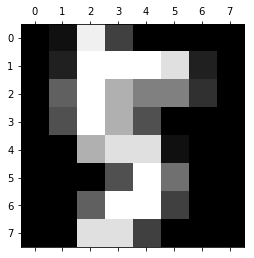

In [66]:
plt.gray() 
index = 46
print(digits.target[index])
plt.matshow(digits.images[index]) 
plt.show() 

## Training data

In [67]:
percent = 80
percent_index = int((data_size*80)/100)
train_data = digits.data[:percent_index]
train_target = digits.target[:percent_index]

## Testing Data

In [68]:
test_target = digits.target[percent_index+1:target_size]
test_data = digits.data[percent_index+1:data_size]

# 2. Classification using Decision Trees

In [69]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)
# Test our data
prediction = clf.predict(test_data)
# Calculate the accuracy of the prediction
decision_tree_accuracy = accuracy_score(test_target, prediction)*100
print("Accuracy: {0:.2f}%".format(decision_tree_accuracy))

Accuracy: 78.55%


# 3. Classification using K Neighbors

In [70]:
clf = KNeighborsClassifier()
clf = clf.fit(train_data, train_target)
# Test our data
prediction = clf.predict(test_data)
# Calculate the accuracy of the prediction
k_neighbors_accuracy = accuracy_score(test_target, prediction)*100
print("Accuracy: {0:.2f}%".format(k_neighbors_accuracy))

Accuracy: 96.38%


# 4. Using our own kNN classifier
Let's now implement our own classifier. We will package it in a class of its own. We need 2 public functions to make it a classifier: *fit()* and *predict()*

Our classifier is modeled after a K Neighbours algorithm. Here's a short video explaining how kNNs work:

In [71]:
from IPython.display import HTML

# Youtube
HTML('<div style="position:relative;height:0;padding-bottom:56.25%"><iframe src="https://www.youtube.com/embed/UqYde-LULfs?ecver=2" width="320" height="180" frameborder="0" style="position:absolute;width:100%;height:100%;left:0" allowfullscreen></iframe></div>')

In [72]:
import random
from scipy.spatial import distance
# Our classifie
class OurClassifier():
    def fit(self, x, y):
        self.x = x
        self.y = y
        return self
    
    #Meaduring the distance between 2 points
    def euclidien_distance(self, a, b):
        return distance.euclidean(a,b)
    
    def closest(self, a):
        min_distance = self.euclidien_distance(self.x[0],a)
        min_y = self.y[0]
        for index in range(1,len(self.x)):
            distance = self.euclidien_distance(self.x[index],a)
            if distance < min_distance:
                min_distance = distance
                min_y = self.y[index]
        return min_y

    def predict(self, x):
        predictions = []
        for row in x:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    

Let's test its accuracy with our MNIST dataset

In [73]:
clf = OurClassifier()
clf = clf.fit(train_data, train_target)
# Test our data
prediction = clf.predict(test_data)
# Calculate the accuracy of the prediction
k_neighbors_accuracy = accuracy_score(test_target, prediction)*100
print("Accuracy: {0:.2f}%".format(k_neighbors_accuracy))

Accuracy: 95.54%


# Plot the decision tree graph
We plot the decixion graph in a PDF file

In [74]:
feature_names = [None]*64
for i in range(64):
    feature_names[i] = "digit{}".format(i+1)
label_names = [None]*10
for i in range(10):
    label_names[i] = "{}".format(i)
dot_data = StringIO()
tree.export_graphviz(clf, 
                    out_file=dot_data,
                    feature_names=feature_names,
                    class_names=label_names,
                    filled=True,
                    rounded=True,
                    impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('digits.pdf')

                            

AttributeError: 'OurClassifier' object has no attribute 'tree_'

# 5. 1 Layer Neural Network

We have to One Hot Encode our labels:

In [75]:
train_labels = [0]*len(train_target)
for index in range(len(train_target)):
    train_labels[index] = [0]*10
    train_labels[index][train_target[index]] = 1

test_labels = [0]*len(test_target)
for index in range(len(test_target)):
    test_labels[index] = [0]*10
    test_labels[index][test_target[index]] = 1

for i in range(40):
    print(train_labels[i],train_target[i])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 2
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 3
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 4
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 5
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 6
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 7
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 9
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 2
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 3
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 4
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 5
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 6
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 7
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 9
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 2
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 3
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 4
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 5
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 6
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 7
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 9
[1, 0, 0, 

In [89]:
import tensorflow as tf

# Parameters
learning_rate = 0.5
training_iters = 100
batch_size = 200
display_step = 10

# Network Parameters
n_input = 64 # MNIST data input (img shape: 8*8)
n_classes = 10 # MNIST total classes (0-9 digits)

# Making the graph interactive
# Creating the graph
x = tf.placeholder(tf.float32, [None, n_input], name="x");
y_ = tf.placeholder(tf.float32, shape=[None, 10], name="y_")

w = tf.Variable(tf.zeros([n_input,n_classes]), name="w");
b = tf.Variable(tf.zeros([n_classes]), name="b");

y = tf.add(tf.matmul(x,w),b)

Explore the graph

In [90]:
print(x)
print(train_labels[0])
#tf.get_default_graph().as_graph_def()

Tensor("x_4:0", shape=(?, 64), dtype=float32)
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Create the model

In [108]:
sess = tf.Session()
def get_weights():
    return w.eval(session=sess)

def predict_1layer_nn(data):
    # Predict
    feed_dict = {x: data}
    return sess.run(tf.arg_max(y,1)[0], feed_dict=feed_dict)

def train_1layer_nn():
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1));
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32));


    # Initializing the variables
    init = tf.global_variables_initializer()
    tf.train.Saver()
    # Train
    sess.run(init);
    sys.stdout.write("\n")
    for index in range(len(train_data)//batch_size):
        for step in range(training_iters):
            batch_x = train_data[index*batch_size:(index+1)*batch_size]
            batch_y = train_labels[index*batch_size:(index+1)*batch_size]
            train_step.run(feed_dict={x: batch_x, y_: batch_y},session=sess)


            if (step%display_step):
                sys.stdout.write("Model Training Accuracy: {0:.2f}%\r".format(accuracy.eval(feed_dict={x: batch_x, y_: batch_y}, session=sess)*100))

    # Test
    sys.stdout.write("\n")
    return accuracy.eval(feed_dict={x: test_data, y_: test_labels},session=sess)*100
       

In [109]:
sys.stdout.write("Testing Accuracy: {0:.2f}%".format(train_1layer_nn()))
 


Model Training Accuracy: 100.00%
Testing Accuracy: 86.63%

Let's test some elements

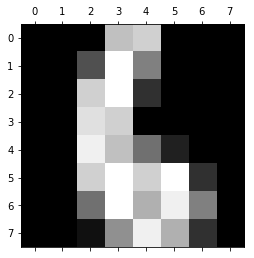

True Value: 6

Predicted : 6



In [110]:
# Predict
index = 6
plt.matshow(digits.images[index]) 
plt.show() 
print("True Value: {}\n".format(digits.target[index]))
print("Predicted : {}\n".format(predict_1layer_nn([digits.data[index]])))


In [111]:
# Find errors in prediction
errors = []
for index in range (len(test_data)):
    if (test_target[index] != predict_1layer_nn([test_data[index]])):
        errors.append(index)


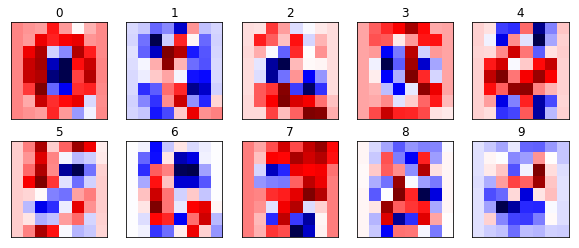

In [114]:
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(get_weights().T[i].reshape(8, 8), cmap=plt.cm.seismic)
    a.set_title(digits.target[i])
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

Display all pictures that were predicted wrong.

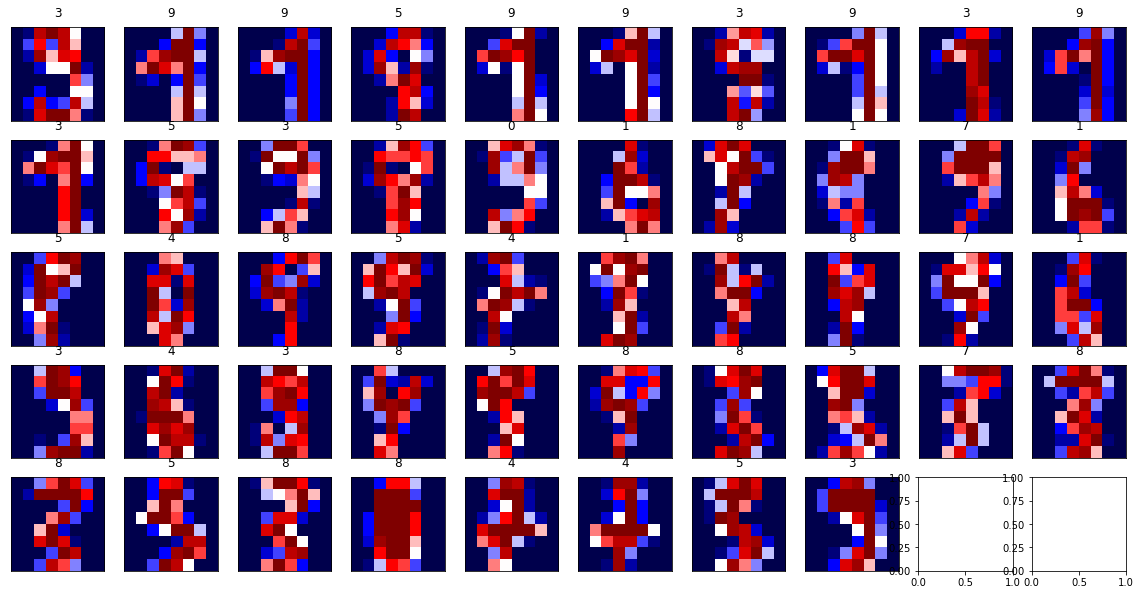

In [99]:
f, axes = plt.subplots(5, 10, figsize=(20,10))
axes = axes.reshape(-1)
for i in range(len(errors)):
    a = axes[i]
    a.matshow(digits.images[errors[i]+percent_index+1], cmap=plt.cm.seismic) 
#    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(predict_1layer_nn([test_data[errors[i]]]))
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

## Using TFLearn

In [25]:
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

### Import the dataset

In [27]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
tf_test_data = mnist.test.images
tf_test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


### Display some data

In [37]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, tf_test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

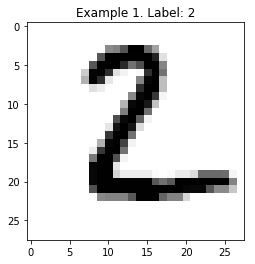

In [38]:
display(1)

### Linear Classifier

In [44]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

/Users/nabylbennouri/anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


LinearClassifier(params={'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'joint_weights': False, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x11e1d6668>, 'optimizer': None, 'gradient_clip_norm': None})

### Evaluate the classifier

In [45]:
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)["accuracy"])

/Users/nabylbennouri/anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.9216


### Classify a few data

In [59]:
# here's one it gets right
print("Predicted {}, Label: {}".format(classifier.predict(tf_test_data[0]), tf_test_labels[0]))
display(0)

NameError: name 'tf_test_data' is not defined

### Visualizing the weights

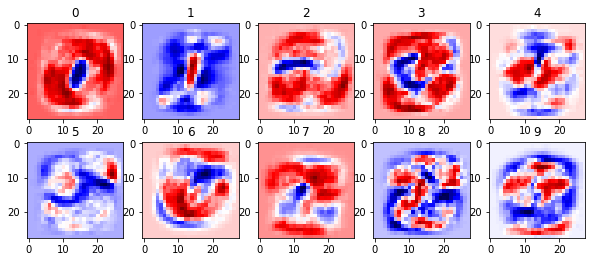

In [50]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

## Building a convolution network